In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew

In [2]:
df = pd.read_csv("train.csv")

In [5]:
df.head()
corr50=df[['Id','OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','SalePrice']]

In [6]:
df.corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [124]:
corr50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
Id              1460 non-null int64
OverallQual     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
TotalBsmtSF     1460 non-null int64
1stFlrSF        1460 non-null int64
GrLivArea       1460 non-null int64
FullBath        1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
GarageCars      1460 non-null int64
GarageArea      1460 non-null int64
SalePrice       1460 non-null int64
dtypes: int64(12)
memory usage: 137.0 KB


In [125]:
df.isnull().sum().sort_values().tail(20)

Utilities          0
Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtFinType2      38
BsmtExposure      38
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
GarageCond        81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

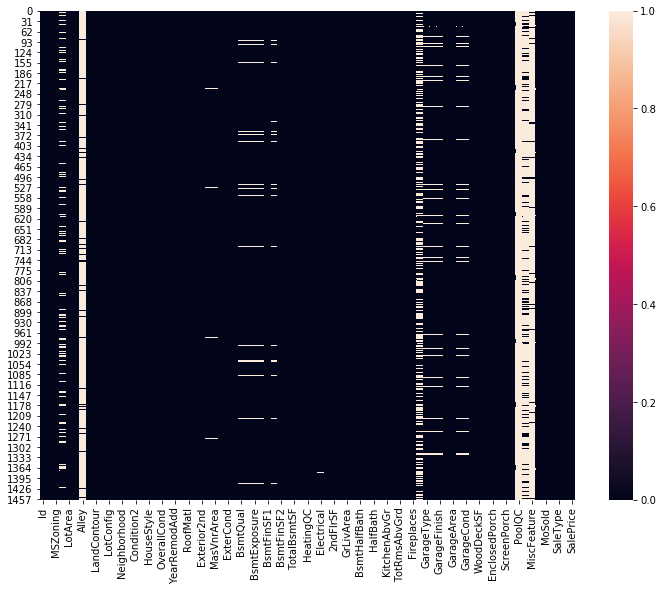

In [126]:
plt.figure(figsize=(12,9))
sns.heatmap(df.isnull())

sns.distplot(df['SalePrice'].dropna(),fit=norm)

In [128]:
df['LotFrontage'].fillna(method='ffill',inplace=True)

In [11]:
df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],inplace=True,axis=1)

In [28]:
df[df['BsmtQual'].isnull()][['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure']]

,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,BsmtExposure
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


In [30]:
df.head()[['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure']]

,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,BsmtExposure
0,Gd,TA,GLQ,Unf,No
1,Gd,TA,ALQ,Unf,Gd
2,Gd,TA,GLQ,Unf,Mn
3,TA,Gd,ALQ,Unf,No
4,Gd,TA,GLQ,Unf,Av


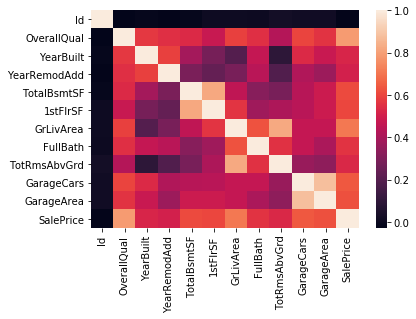

In [50]:
sns.heatmap(corr50.corr())

In [51]:
corr50.dtypes

Id              int64
OverallQual     int64
YearBuilt       int64
YearRemodAdd    int64
TotalBsmtSF     int64
1stFlrSF        int64
GrLivArea       int64
FullBath        int64
TotRmsAbvGrd    int64
GarageCars      int64
GarageArea      int64
SalePrice       int64
dtype: object

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [8]:
X=corr50.drop(['Id','SalePrice'],axis=1).values
y=corr50['SalePrice'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [11]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
predictions=model.predict(X_test)

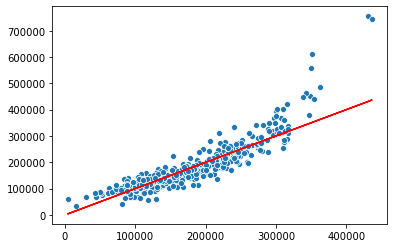

In [13]:
sns.scatterplot(predictions,y_test)
plt.plot(predictions,predictions,'r')
#plt.plot(y_test,y_test,'g')

In [14]:
model.score(X_test,y_test)

0.7891030053007736

In [73]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [74]:
model=LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
test=pd.read_csv("test.csv")

In [16]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [17]:
corr50.columns

Index(['Id', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')

In [90]:
test=test[['Id','OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]

In [91]:
testing=test.drop(['Id'],axis=1)

In [92]:
testing.isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     1
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      1
GarageArea      1
dtype: int64

In [94]:
testing.fillna(method='ffill',inplace=True)

In [95]:
testing=scaler.transform(testing)

In [96]:
predictions=model.predict(testing)

In [105]:
predictions=pd.DataFrame(predictions)
predictions.columns = ['SalePrice']

submit=pd.DataFrame(test['Id'])

In [109]:
a=pd.concat([submit,predictions],axis=1)

In [110]:
a.to_csv("submit.csv",index=False)